<a href="https://colab.research.google.com/github/HarshithaNalla/FML-LAB/blob/main/multivariate_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [2]:
startup=pd.read_csv("/content/50_Startups_dataset.csv")
startup.columns

Index(['Unnamed: 0', 'R&D Spend', 'Administration', 'Marketing Spend', 'State',
       'Profit'],
      dtype='object')

In [3]:
startup.describe()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,Profit
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,24.50000,73721.715600,121344.739600,211025.197800,112012.739200
std,14.57738,45902.256482,28017.802755,122290.310726,40306.180338
min,0.00000,0.100000,51283.240000,0.100000,14681.500000
25%,12.25000,39936.470000,103730.975000,129300.232500,90139.002500
50%,24.50000,73051.180000,122699.895000,212716.340000,107978.290000
75%,36.75000,101602.900000,144842.280000,299469.185000,139766.077500
max,49.00000,165349.300000,182645.660000,471784.200000,192261.930000


In [4]:
startup.isnull().sum()

Unnamed: 0         0
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
startup.corr()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,Profit
Unnamed: 0,1.000000,-0.979395,-0.229336,-0.729937,-0.973629
R&D Spend,-0.979395,1.000000,0.241955,0.724248,0.972900
Administration,-0.229336,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,-0.729937,0.724248,-0.032154,1.000000,0.747766
Profit,-0.973629,0.972900,0.200717,0.747766,1.000000


In [44]:
data1.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [45]:
st=data1.corr()
st

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.243438,0.711654,0.978437
Administration,0.243438,1.000000,-0.037280,0.205841
Marketing Spend,0.711654,-0.037280,1.000000,0.739307
Profit,0.978437,0.205841,0.739307,1.000000


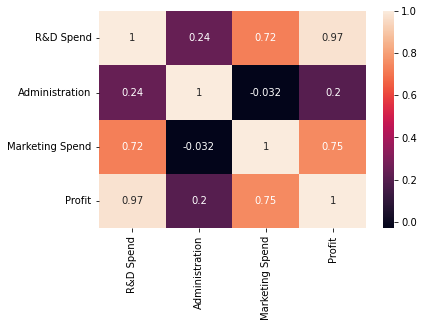

In [15]:
sns.heatmap(st,annot= True)
plt.show()

<Axes: >

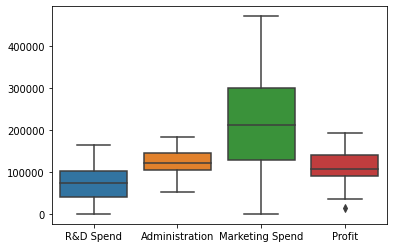

In [39]:
#outliers
sns.boxplot(data1)

In [19]:

qt1=data1["Profit"].quantile(0.25)
qt2=data1["Profit"].quantile(0.75)
q=qt2-qt1
q

49627.07500000001

In [27]:
up=qt2+1.5*q
down=qt1-1.5*q
up,down

(214206.69000000003, 15698.389999999985)

In [42]:
#removing outliers
data1 = data1[(data1["Profit"]> down) & (data1["Profit"] < up)]
data1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.30,136897.90,471784.20,New York,192261.93
1,162597.80,151377.69,443898.63,California,191792.16
2,153441.61,101145.65,407934.64,Florida,191050.49
3,144372.51,118671.95,383199.72,New York,182902.09
4,142107.44,91391.87,366168.52,Florida,166188.04
5,131877.00,99814.81,362861.46,New York,156991.22
6,134615.56,147198.97,127716.92,California,156122.61
7,130298.23,145530.16,323876.78,Florida,155752.70
8,120542.62,148719.05,311613.39,New York,152211.87
9,123334.98,108679.27,304981.72,California,149760.06


<Axes: >

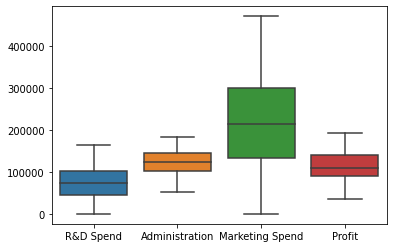

In [43]:
sns.boxplot(data1)


In [68]:
X=data1.iloc[:,:3]
y=data1.loc[:,'Profit']

In [69]:
X.shape,y.shape

((49, 3), (49,))

In [70]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,train_size=0.70,random_state=35) 

In [72]:
x_train.shape,x_test.shape

((34, 3), (15, 3))

In [73]:
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [74]:
y_pred=reg.predict(x_train)

In [75]:

print(f'MAE = {mean_absolute_error(y_train, y_pred)}')
print(f'MSE = {mean_squared_error(y_train, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, y_pred))}')
print(f'R_2 = {r2_score(y_train, y_pred)}')

MAE = 5980.5750077193825
MSE = 52968228.77909245
RMSE = 7277.9275057596205
R_2 = 0.9663686042138812


In [76]:
y_predict=reg.predict(x_test)

In [78]:
print(f'MAE = {mean_absolute_error(y_test, y_predict)}')
print(f'MSE = {mean_squared_error(y_test, y_predict)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_predict))}')
print(f'R_2 = {r2_score(y_test, y_predict)}')
     


MAE = 6398.43926765633
MSE = 67908570.29378943
RMSE = 8240.665646280611
R_2 = 0.9228150226008024
